In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In /home/tanishk/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tanishk/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tanishk/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/tanishk/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tanishk/.local/lib/python3.6/site-packages/matplotlib/mpl-d

In [5]:
df = pd.read_csv('../Data_Sets/mnist_train.csv')

In [6]:
df.shape

(42000, 785)

In [4]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [8]:
data = df.to_numpy()

In [9]:
X = data[:,1:]
Y = data[:,0]

In [10]:
X.shape

(42000, 784)

In [11]:
split = int(0.8*X.shape[0])

In [12]:
X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

In [13]:
print(X_train.shape,Y_test.shape)

(33600, 784) (8400,)


In [14]:
def dis(x1,x2):
    
    return np.sqrt(sum((x1-x2)**2))
    

In [15]:
def KNN (X,Y,query_point,k=5):
    
    vals = []
    m =X.shape[0]
    
    for i in range(m):
        d = dis(query_point,X[i])
        vals.append((d,Y[i]))
    
    vals = sorted(vals)
    vals = vals[:k]
    vals=np.array(vals)
    
    new_vals = np.unique(vals[:,1], return_counts = True)
    
    index =  new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
    

In [16]:
pred = KNN(X_train,Y_train,X_test[5])
print(int(pred))

6


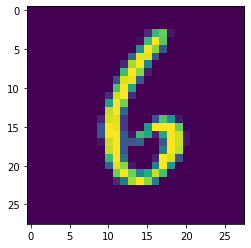

6


In [17]:
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img)
    plt.show()
    
drawImg(X_test[5])
print(Y_test[5])

In [18]:
def accuracy(X,Y,Xtest,Ytest):
    m = Xtest.shape[0]
    predictions = []
    for i in range(m):
        pred = KNN(X,Y,Xtest[i])
        predictions.append(pred)
        
    score = np.sum(Ytest==predictions)/Ytest.shape[0]
    
    return score
       


In [ ]:
score  = accuracy(X_train,Y_train,X_test,Y_test)